<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:**
- André Yahir Gonzalez Cuevas
- Judith Alejandra Hinojosa Rábago

**Fecha:** 12 de Marzo del 2024.

**Expediente:**
- 739922
- 737456
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: [https://github.com/Andr3Glez/ProyectoConjunto5_ANGonzalez_JAHinojosa](https://github.com/Andr3Glez/ProyectoConjunto5_ANGonzalez_JAHinojosa)

# Tarea 5: Clase 13

## Enunciado de tarea

Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:

[https://www.kaggle.com/datasets/yasserh/housing-prices-dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset).

### Ejercicio 1: Implementar todas las técnicas vistas.

#### Estudiante 1: André Yahir Gonzalez Cuevas

In [16]:
# Código de solución estudiante 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Conv1D, MaxPooling1D

from keras.models import Model
from keras.utils import plot_model
from keras.layers import Input, concatenate


In [50]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Modelos CNN Univariado

In [3]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [5]:
n_steps = 3
# Dividir en muestras
X, y = split_univariate_sequence(df['price'], n_steps)

In [7]:
X = X.reshape((X.shape[0], X.shape[1], 1))

print(f' Tamaño de X: {X.shape}')
print(f'Tamaño de y: {y.shape}')

 Tamaño de X: (542, 3, 1)
Tamaño de y: (542,)


In [10]:
model_1 = Sequential([
    layers.Input(shape=(n_steps,1)),
    layers.convolutional.Conv1D(64, 2, activation='relu'),
    layers.convolutional.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, 'relu'),
    layers.Dense(1)
])

In [11]:
model_1.compile(optimizer='adam', loss='mse')
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,493
Trainable params: 3,493
Non-trainable params: 0
______________________________________________________

In [12]:
history_1 = model_1.fit(X, y, epochs=100, verbose=False)

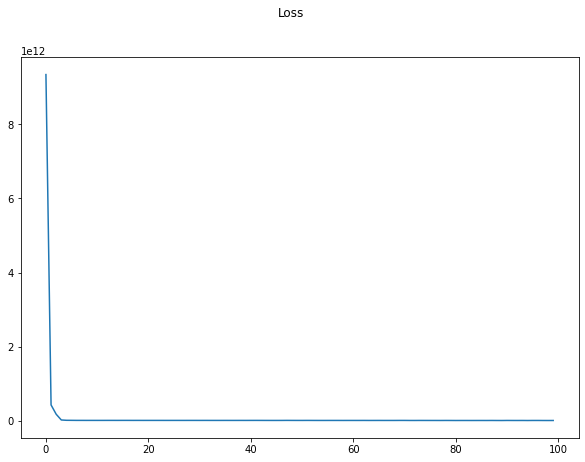

In [14]:
plt.figure(figsize=(10,7))
plt.plot(history_1.history['loss'])
plt.suptitle('Loss')
plt.show()

### Modelos CNN Multivariados

#### Entradas multiples

In [51]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [52]:
cols = df_dummies.columns[1:].to_list()
cols.append('price')

In [53]:
df_dummies = df_dummies[cols]

In [54]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence(sequence: np.ndarray, n_steps: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [55]:
n_steps = 3
X, y = split_multivariate_sequence(df_dummies.to_numpy(), n_steps)

n_features = X.shape[2]

print(f' Tamaño de X: {X.shape}')
print(f'Tamaño de y: {y.shape}')

 Tamaño de X: (543, 3, 13)
Tamaño de y: (543,)


In [56]:
model_2 = Sequential([
    layers.Input(shape=(n_steps, n_features)),
    layers.convolutional.Conv1D(64, 2, activation='relu'),
    layers.convolutional.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(n_features)
])

In [57]:
model_2.compile(optimizer='adam', loss='mse')
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 2, 64)             1728      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 50)                3250      
                                                                 
 dense_13 (Dense)            (None, 13)                663       
                                                                 
Total params: 5,641
Trainable params: 5,641
Non-trainable params: 0
____________________________________________________

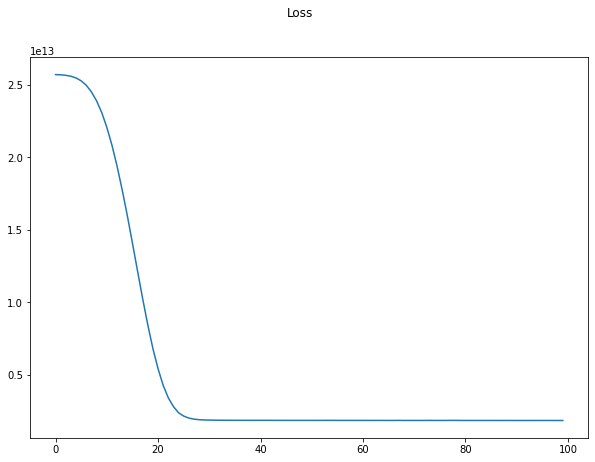

In [58]:
history_2 = model_2.fit(X, y, epochs=100, verbose=False)
plt.figure(figsize=(10,7))
plt.plot(history_2.history['loss'])
plt.suptitle('Loss')
plt.show()

#### Múltiples Encabezamientos

In [65]:
n_features = 1
n_steps = 3

# Primera entrada
visible_1 = Input(shape=(n_steps, n_features))
cnn_1 = Conv1D(64, 2, activation='relu')(visible_1)
cnn_1 = MaxPooling1D()(cnn_1)
cnn_1 = Flatten()(cnn_1)

# Segunda entarda
visible_2 = Input(shape=(n_steps, n_features))
cnn_2 = Conv1D(64, 2, activation='relu')(visible_2)
cnn_2 = MaxPooling1D()(cnn_2)
cnn_2 = Flatten()(cnn_2)

merge = concatenate([cnn_1, cnn_2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

In [66]:
model_3 = Model(inputs=[visible_1, visible_2], outputs=output)
model_3.compile(optimizer='adam', loss='mse')
model_3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 3, 1)]       0           []                               
                                                                                                  
 input_11 (InputLayer)          [(None, 3, 1)]       0           []                               
                                                                                                  
 conv1d_9 (Conv1D)              (None, 2, 64)        192         ['input_10[0][0]']               
                                                                                                  
 conv1d_10 (Conv1D)             (None, 2, 64)        192         ['input_11[0][0]']               
                                                                                            

In [67]:
n_features = 1
X1 = X[:, :, 0].reshape(X.shape[0], X.shape[1], n_features)
X2 = X[:, :, 3].reshape(X.shape[0], X.shape[1], n_features)

history_3 = model_3.fit([X1, X2], y, epochs=1000, verbose=False)

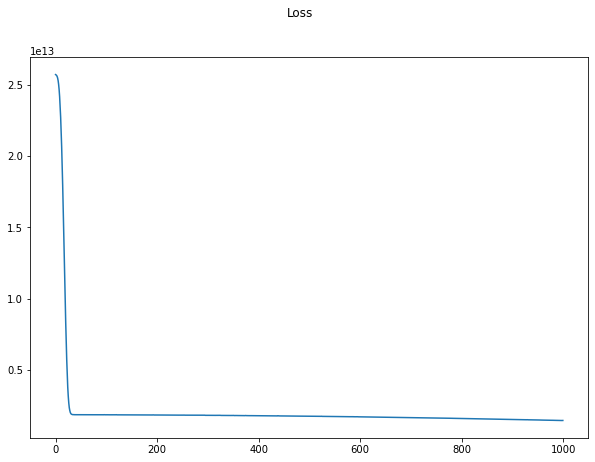

In [70]:
plt.figure(figsize=(10,7))
plt.plot(history_3.history['loss'])
plt.suptitle('Loss')
plt.show()

#### Múltiples Series Paralelas

In [77]:
# dividir una secuencia multivariada en muestras para predicción múltiple
def split_multiple_forecasting_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [78]:
n_steps = 3
X_4, y_4 = split_multiple_forecasting_sequence(df_dummies.to_numpy(), n_steps=n_steps)
n_features = X_4.shape[2]

In [79]:
model_4 = Sequential()
model_4.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_4.add(MaxPooling1D())
model_4.add(Flatten())
model_4.add(Dense(50, activation='relu'))
model_4.add(Dense(n_features))
model_4.compile(optimizer='adam', loss='mse')
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 2, 64)             1856      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 50)                3250      
                                                                 
 dense_22 (Dense)            (None, 14)                714       
                                                                 
Total params: 5,820
Trainable params: 5,820
Non-trainable params: 0
____________________________________________________

In [80]:
history_4 = model_4.fit(X_4, y_4, epochs=1000, verbose=0)

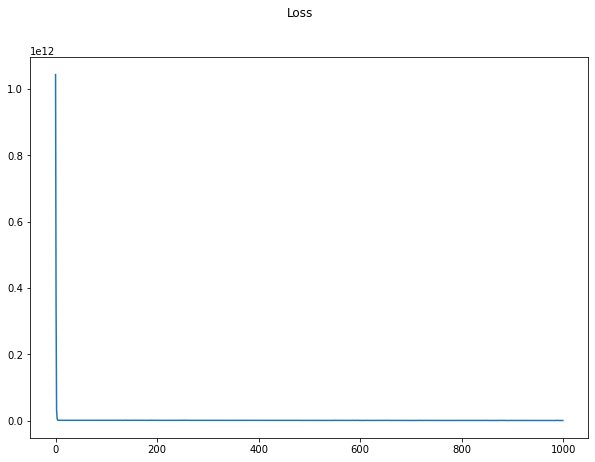

In [81]:
plt.figure(figsize=(10,7))
plt.plot(history_4.history['loss'])
plt.suptitle('Loss')
plt.show()

#### Multi-output

In [105]:
import tensorflow as tf

columns_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in columns_to_encode:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# One-hot encoding para la columna 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'])


X = df.drop('price', axis=1)
y = df['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X = tf.convert_to_tensor(X.values.reshape(X.shape[0], X.shape[1], 1), dtype=tf.float32)
y = tf.convert_to_tensor(y.values.reshape(y.shape[0], 1), dtype=tf.float32)

In [106]:
n_steps = X.shape[1]
n_features = X.shape[2]

In [107]:
visible = Input(shape=(n_steps, n_features))
cnn = Conv1D(64, 2, activation='relu')(visible)
cnn = MaxPooling1D()(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)

output_1 = Dense(1)(cnn)
output_2 = Dense(1)(cnn)
output_3 = Dense(1)(cnn)

In [108]:
# Ponemos todo junto
model_5 = Model(inputs=visible, outputs=[output_1, output_2, output_3])
model_5.compile(optimizer='adam', loss='mse')
model_5.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 14, 1)]      0           []                               
                                                                                                  
 conv1d_17 (Conv1D)             (None, 13, 64)       192         ['input_15[0][0]']               
                                                                                                  
 max_pooling1d_17 (MaxPooling1D  (None, 6, 64)       0           ['conv1d_17[0][0]']              
 )                                                                                                
                                                                                                  
 flatten_17 (Flatten)           (None, 384)          0           ['max_pooling1d_17[0][0]'] 

In [109]:
history = model_5.fit(X, [y, y, y], epochs=1000, verbose=0)

<AxesSubplot:>

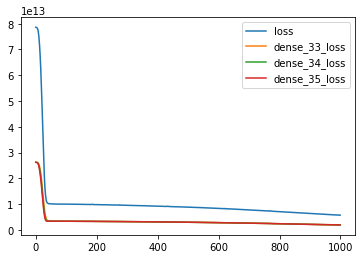

In [111]:
pd.DataFrame(history.history).plot()

### Serie temporal univariada

In [118]:
X = df.drop('price', axis=1)
y = df['price']

X = X.values.reshape(X.shape[0], X.shape[1], 1)

n_steps_in, n_steps_out = X.shape[1], 1
n_features = X.shape[2]

In [119]:
model_6 = Sequential()
model_6.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_6.add(MaxPooling1D())
model_6.add(Flatten())
model_6.add(Dense(50, activation='relu'))
model_6.add(Dense(n_steps_out))
model_6.compile(optimizer='adam', loss='mse')
model_6.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_19 (Conv1D)          (None, 13, 64)            192       
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 6, 64)            0         
 g1D)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 384)               0         
                                                                 
 dense_38 (Dense)            (None, 50)                19250     
                                                                 
 dense_39 (Dense)            (None, 1)                 51        
                                                                 
Total params: 19,493
Trainable params: 19,493
Non-trainable params: 0
_________________________________________________

In [120]:
history_6 = model_6.fit(X, y, epochs=1000, verbose=0)

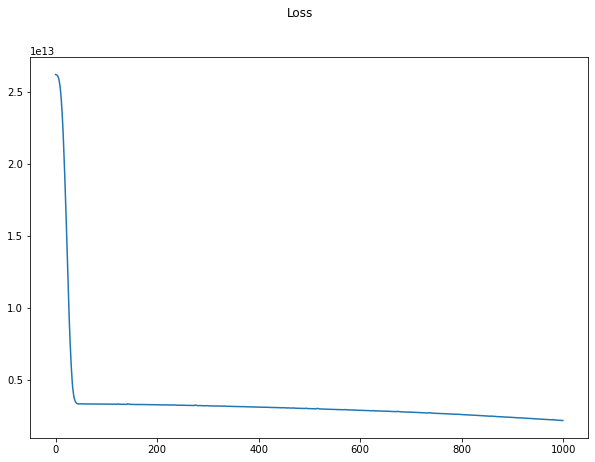

In [122]:
plt.figure(figsize=(10,7))
plt.plot(history_6.history['loss'])
plt.suptitle('Loss')
plt.show()

### Serie temporal multivariada

In [123]:
model_7 = Sequential()
model_7.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_7.add(MaxPooling1D())
model_7.add(Flatten())
model_7.add(Dense(50, activation='relu'))
model_7.add(Dense(n_steps_out))
model_7.compile(optimizer='adam', loss='mse')
model_7.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 13, 64)            192       
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 6, 64)            0         
 g1D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 384)               0         
                                                                 
 dense_40 (Dense)            (None, 50)                19250     
                                                                 
 dense_41 (Dense)            (None, 1)                 51        
                                                                 
Total params: 19,493
Trainable params: 19,493
Non-trainable params: 0
_________________________________________________

In [124]:
history_7 = model_7.fit(X, y, epochs=1000, verbose=0)

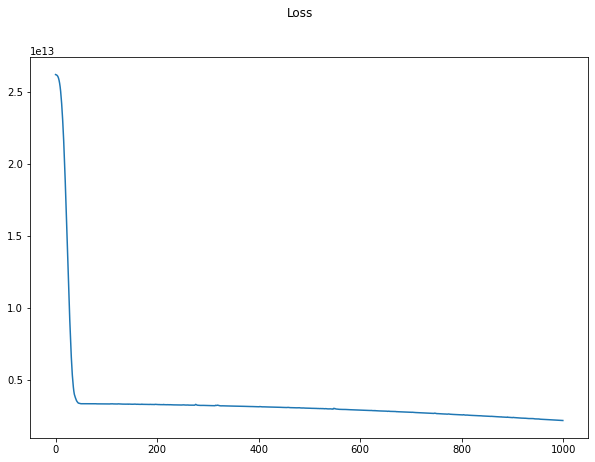

In [125]:
plt.figure(figsize=(10,7))
plt.plot(history_7.history['loss'])
plt.suptitle('Loss')
plt.show()

### Serie temporal multivariada predicción múltiple de cada entrada

In [126]:
model_8 = Sequential()
model_8.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_8.add(MaxPooling1D())
model_8.add(Flatten())
model_8.add(Dense(50, activation='relu'))
model_8.add(Dense(n_steps_out))
model_8.compile(optimizer='adam', loss='mse')
model_8.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_21 (Conv1D)          (None, 13, 64)            192       
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 6, 64)            0         
 g1D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 384)               0         
                                                                 
 dense_42 (Dense)            (None, 50)                19250     
                                                                 
 dense_43 (Dense)            (None, 1)                 51        
                                                                 
Total params: 19,493
Trainable params: 19,493
Non-trainable params: 0
_________________________________________________

In [127]:
history_8 = model_8.fit(X, y, epochs=1000, verbose=0)

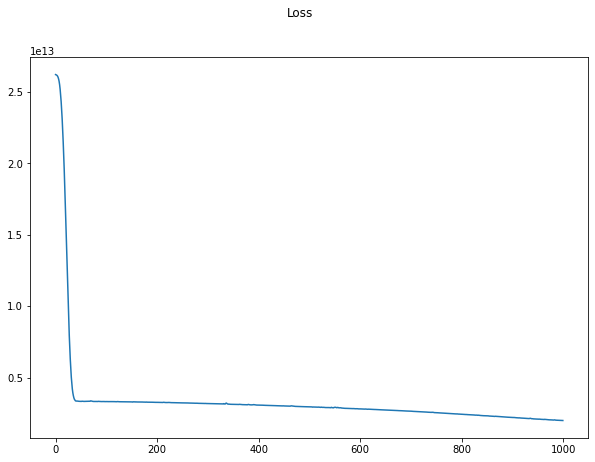

In [128]:
plt.figure(figsize=(10,7))
plt.plot(history_8.history['loss'])
plt.suptitle('Loss')
plt.show()

#### Estudiante 2: Judith Alejandra Hinojosa Rábago

##### 1. Modelos CNN univariados

###### 1.1 Preparación de datos

In [ ]:
# Código de solución estudiante 2

# Paqueterías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Conv1D, MaxPooling1D

In [ ]:
df_judith = pd.read_csv("/content/Housing.csv")

In [ ]:
df_judith.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df_judith.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df_judith.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

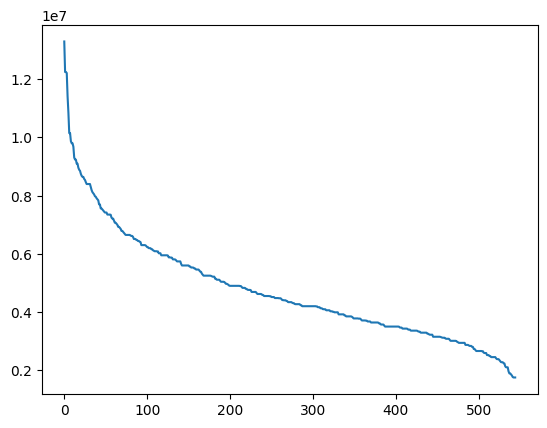

In [ ]:
df_judith['price'].plot()
plt.show()

In [ ]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
# Elegir un número de pasos de tiempo
n_steps_judith = 3
# Dividir en muestras
X_judith, y_judith = split_univariate_sequence(df_judith['price'], n_steps_judith)

In [ ]:
# Número de características de mis datos
n_features_judith = 1

###### 1.2 Modelado con CNN

In [ ]:
# Definimos nuestro modelo
model_1_judith = Sequential()
model_1_judith.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_judith, n_features_judith)))
model_1_judith.add(MaxPooling1D())
model_1_judith.add(Flatten())
model_1_judith.add(Dense(50, activation='relu'))
model_1_judith.add(Dense(1))
model_1_judith.compile(optimizer='adam', loss='mse')
model_1_judith.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 1, 64)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3493 (13.64 KB)
Trainable params: 3493 (13.64 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [ ]:
X_judith.shape

(542, 3)

In [ ]:
# reshape de [samples, timesteps] a [samples, timesteps, features]
X_judith = X_judith.reshape((X_judith.shape[0], X_judith.shape[1], n_features_judith))
X_judith.shape

(542, 3, 1)

In [ ]:
y_judith.shape

(542,)

In [ ]:
# Ajustamos el modelo anterior
history_1_judith = model_1_judith.fit(X_judith, y_judith, epochs=1000, verbose=False)

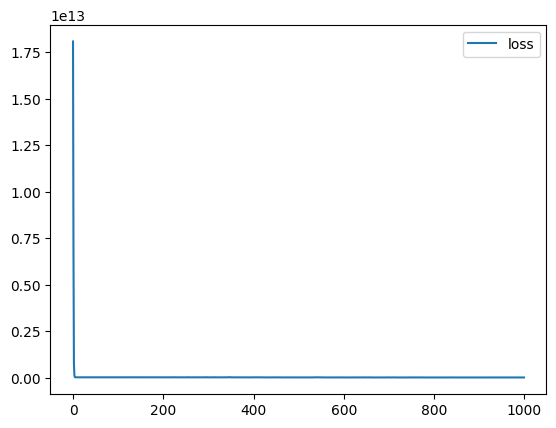

In [ ]:
pd.DataFrame(history_1_judith.history).plot()
plt.show()

In [ ]:
df_judith.price.tail(3).to_numpy()

array([1750000, 1750000, 1750000])

In [ ]:
# Probamos nuestro modelo
x_input_judith = np.array(df_judith.price.tail(3).to_numpy())
x_input_judith = x_input_judith.reshape((1, n_steps_judith, n_features_judith))
yhat_judith = model_1_judith.predict(x_input_judith, verbose=0)
yhat_judith

array([[1752385.4]], dtype=float32)

##### 2. Modelos CNN multivariados

###### 2.1 Series de entradas múltiples

In [ ]:
df_judith.to_numpy().shape

(545, 13)

In [ ]:
df_dummies_judith = pd.get_dummies(df_judith, drop_first=True)

In [ ]:
cols_judith = df_dummies_judith.columns[1:].to_list()
cols_judith.append('price')

In [ ]:
df_dummies_judith = df_dummies_judith[cols_judith]

In [ ]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence(sequence: np.ndarray, n_steps: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
n_steps_judith = 3
X_judith, y_judith = split_multivariate_sequence(df_dummies_judith.to_numpy(), n_steps_judith)

n_features_judith = X_judith.shape[2]

X_judith.shape, y_judith.shape

((543, 3, 13), (543,))

In [ ]:
X_judith[0], y_judith[0]

(array([[7420,    4,    2,    3,    2,    1,    0,    0,    0,    1,    1,
            0,    0],
        [8960,    4,    4,    4,    3,    1,    0,    0,    0,    1,    0,
            0,    0],
        [9960,    3,    2,    2,    2,    1,    0,    1,    0,    0,    1,
            1,    0]]),
 12250000)

###### 2.2 Modelado con CNN

In [ ]:
# Definimos nuestro modelo
model_2_judith = Sequential()
model_2_judith.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_judith, n_features_judith)))
model_2_judith.add(MaxPooling1D())
model_2_judith.add(Flatten())
model_2_judith.add(Dense(50, activation='relu'))
model_2_judith.add(Dense(1))
model_2_judith.compile(optimizer='adam', loss='mse')
model_2_judith.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 2, 64)             1728      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                3250      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5029 (19.64 KB)
Trainable params: 5029 (19.64 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
# Ajustamos el modelo anterior
history_2_judith = model_2_judith.fit(X_judith, y_judith, epochs=1000, verbose=False)

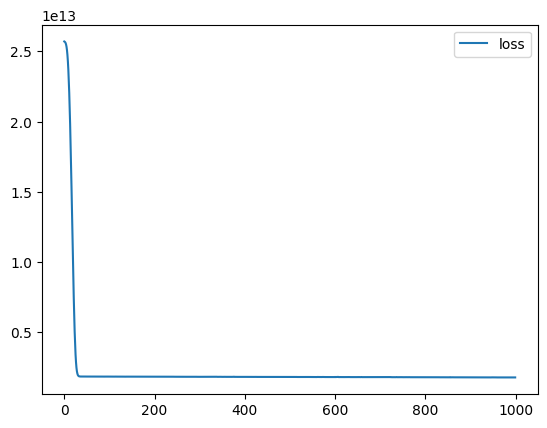

In [ ]:
pd.DataFrame(history_2_judith.history).plot()
plt.show()

In [ ]:
X_judith[-3:][0]

array([[3000,    2,    1,    1,    2,    1,    0,    1,    0,    0,    0,
           0,    1],
       [2400,    3,    1,    1,    0,    0,    0,    0,    0,    0,    0,
           1,    0],
       [3620,    2,    1,    1,    0,    1,    0,    0,    0,    0,    0,
           0,    1]])

In [ ]:
X_judith[-3:][0].shape

(3, 13)

In [ ]:
# Probamos nuestro modelo
x_input_judith = np.array(X_judith[-3:][0])
x_input_judith = x_input_judith.reshape((1, n_steps_judith, n_features_judith))
yhat_judith = model_2_judith.predict(x_input_judith, verbose=0)
yhat_judith

array([[2520446.2]], dtype=float32)

###### 2.3 Modelo CNN con múltiples encabezamientos

In [ ]:
# Paqueterías faltantes
from keras.models import Model
from keras.utils import plot_model
from keras.layers import Input, concatenate

In [ ]:
n_features_judith = 1
n_steps_judith = 3

In [ ]:
# Primer modelo de entrada
visible1 = Input(shape=(n_steps_judith, n_features_judith))
cnn1 = Conv1D(64, 2, activation='relu')(visible1)
cnn1 = MaxPooling1D()(cnn1)
cnn1 = Flatten()(cnn1)

In [ ]:
# Segundo modelo de entrada
visible2 = Input(shape=(n_steps_judith, n_features_judith))
cnn2 = Conv1D(64, 2, activation='relu')(visible2)
cnn2 = MaxPooling1D()(cnn2)
cnn2 = Flatten()(cnn2)

In [ ]:
# merge modelos de entrada
merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

In [ ]:
# Conectar entradas y salida del modelo
model_3_judith = Model(inputs=[visible1, visible2], outputs=output)

model_3_judith.compile(optimizer='adam', loss='mse')

model_3_judith.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 3, 1)]               0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 3, 1)]               0         []                            
                                                                                                  
 conv1d_2 (Conv1D)           (None, 2, 64)                192       ['input_1[0][0]']             
                                                                                                  
 conv1d_3 (Conv1D)           (None, 2, 64)                192       ['input_2[0][0]']             
                                                                                              

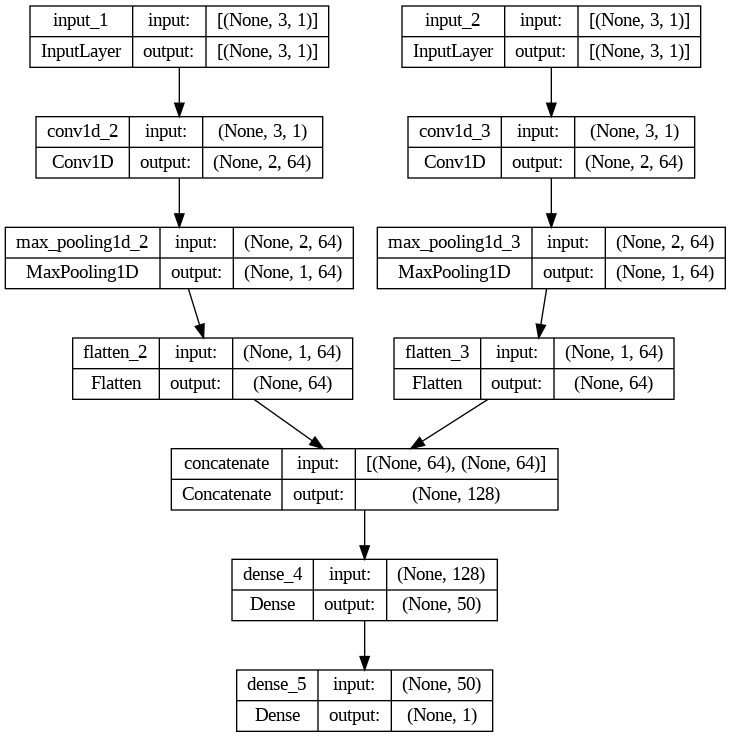

In [ ]:
plot_model(model_3_judith, show_shapes=True, show_layer_names=True)

In [ ]:
X_judith[0].shape

(3, 13)

In [ ]:
# Una serie de tiempo por submodelo
n_features_judith = 1

# Separar datos de entrada
X1_judith = X_judith[:, :, 0].reshape(X_judith.shape[0], X_judith.shape[1], n_features_judith)
X2_judith = X_judith[:, :, 3].reshape(X_judith.shape[0], X_judith.shape[1], n_features_judith)

In [ ]:
X1_judith.shape

(543, 3, 1)

In [ ]:
# Con estos datos podemos ajustar el modelo
history_3_judith = model_3_judith.fit([X1_judith, X2_judith], y_judith, epochs=1000, verbose=0)

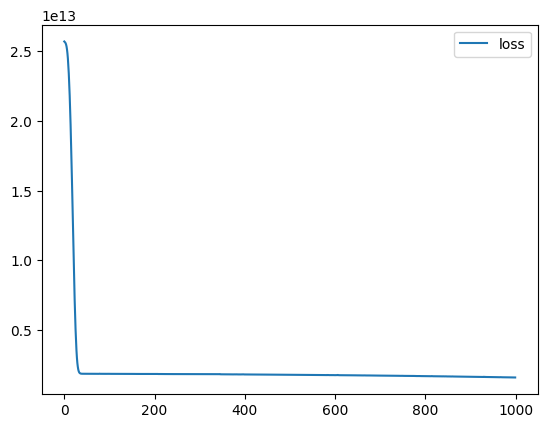

In [ ]:
pd.DataFrame(history_3_judith.history).plot()
plt.show()

In [ ]:
# demonstrate prediction
x1_judith = X1_judith[-3:][0].reshape((1, n_steps_judith, n_features_judith))
x2_judith = X2_judith[-3:][0].reshape((1, n_steps_judith, n_features_judith))
yhat_judith = model_3_judith.predict([x1_judith, x2_judith], verbose=0)
yhat_judith

array([[2527033.5]], dtype=float32)

###### 2.4 Múltiples series paralelas (multivariable forecasting)

In [ ]:
# dividir una secuencia multivariada en muestras para predicción múltiple
def split_multiple_forecasting_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
n_steps_judith = 3
X_m_judith, y_m_judith = split_multiple_forecasting_sequence(df_dummies_judith.to_numpy(), n_steps=n_steps_judith)

In [ ]:
X_m_judith.shape

(542, 3, 14)

In [ ]:
y_m_judith.shape

(542, 14)

In [ ]:
n_features_judith = X_m_judith.shape[2]

# define model_4
model_4_judith = Sequential()
model_4_judith.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_judith, n_features_judith)))
model_4_judith.add(MaxPooling1D())
model_4_judith.add(Flatten())
model_4_judith.add(Dense(50, activation='relu'))
model_4_judith.add(Dense(n_features_judith))
model_4_judith.compile(optimizer='adam', loss='mse')

model_4_judith.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 2, 64)             1856      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 50)                3250      
                                                                 
 dense_9 (Dense)             (None, 14)                714       
                                                                 
Total params: 5820 (22.73 KB)
Trainable params: 5820 (22.73 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
# Ajustar el modelo
history_4_judith = model_4_judith.fit(X_m_judith, y_m_judith, epochs=1000, verbose=0)

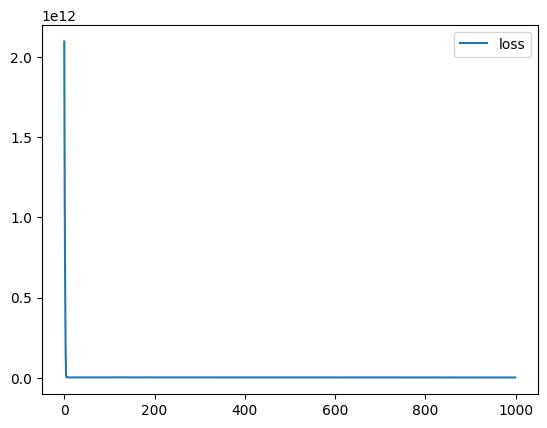

In [ ]:
pd.DataFrame(history_4_judith.history).plot()
plt.show()

In [ ]:
# Probar el modelo
x_input_judith = X_m_judith[-1].reshape((1, n_steps_judith, n_features_judith))
yhat_judith = model_4_judith.predict(x_input_judith, verbose=0)
yhat_judith

array([[ 1.29674414e+03, -2.14291000e+02,  1.06606067e+03,
        -9.38949646e+02,  2.94606628e+02,  1.11098564e+02,
         4.08270935e+02,  3.32998596e+02,  1.05383972e+03,
        -4.09230225e+02,  3.40488220e+02, -1.29891968e+02,
        -4.97181053e+01,  1.75866112e+06]], dtype=float32)

###### 2.5 Multi-output CNN Model

In [ ]:
# Definimos el modelo
n_features_judith = 3

visible = Input(shape=(n_steps_judith, n_features_judith))
cnn = Conv1D(64, 2, activation='relu')(visible)
cnn = MaxPooling1D()(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)

In [ ]:
# Definimos salida 1
output1 = Dense(1)(cnn)
# Definimos salida 2
output2 = Dense(1)(cnn)
# Definimos salida 3
output3 = Dense(1)(cnn)

In [ ]:
# Ponemos todo junto
model_5_judith = Model(inputs=visible, outputs=[output1, output2, output3])
model_5_judith.compile(optimizer='adam', loss='mse')

In [ ]:
model_5_judith.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 3, 3)]               0         []                            
                                                                                                  
 conv1d_7 (Conv1D)           (None, 2, 64)                448       ['input_4[0][0]']             
                                                                                                  
 max_pooling1d_7 (MaxPoolin  (None, 1, 64)                0         ['conv1d_7[0][0]']            
 g1D)                                                                                             
                                                                                                  
 flatten_7 (Flatten)         (None, 64)                   0         ['max_pooling1d_7[0][0]'

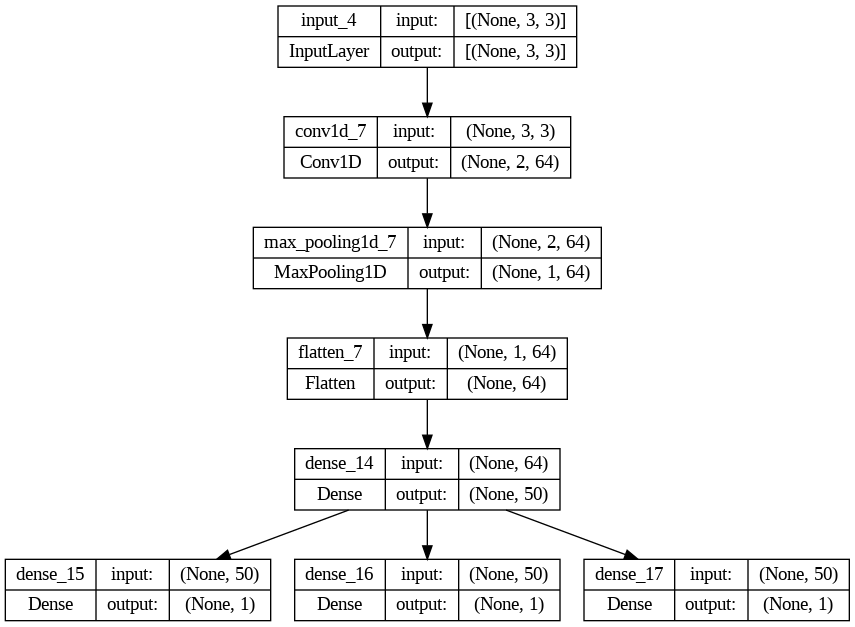

In [ ]:
plot_model(model_5_judith, show_shapes=True, show_layer_names=True)

In [ ]:
# Separar salidas
y1_judith = y_m_judith[:, 0].reshape((y_m_judith.shape[0], 1))
y2_judith = y_m_judith[:, 1].reshape((y_m_judith.shape[0], 1))
y3_judith = y_m_judith[:, -1].reshape((y_m_judith.shape[0], 1))

In [ ]:
y1_judith.shape

(542, 1)

In [ ]:
X_m_judith[:, :, [0, 1, 13]].shape

(542, 3, 3)

In [ ]:
# Ajustar el modelo
history_5_judith = model_5_judith.fit(X_m_judith[:, :, [0, 1, 13]], [y1_judith,y2_judith,y3_judith], epochs=750, verbose=0)

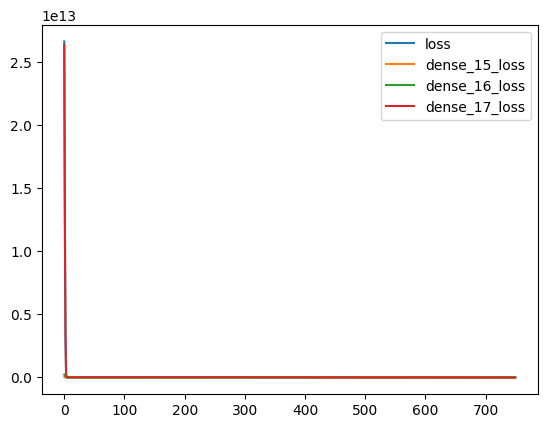

In [ ]:
pd.DataFrame(history_5_judith.history).plot()
plt.show()

In [ ]:
# Probar nuestro modelo
x_input_judith = X_m_judith[-1, :, [0, 1, 13]].reshape((1, n_steps_judith, n_features_judith))
yhat_judith = model_5_judith.predict(x_input_judith, verbose=0)
yhat_judith

[array([[607969.5]], dtype=float32),
 array([[500451.72]], dtype=float32),
 array([[21198672.]], dtype=float32)]

##### 3. Modelos CNN de pasos múltiples

###### 3.1 Serie temporal univariada

In [ ]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence_m_step(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
# Probemos la función creada
# elegir un número de pasos de tiempo
n_steps_in_judith, n_steps_out_judith = 3, 2
# Particionar mis datos
X_judith, y_judith = split_univariate_sequence_m_step(df_judith['price'], n_steps_in_judith, n_steps_out_judith)

In [ ]:
X_judith.shape, y_judith.shape

((541, 3), (541, 2))

In [ ]:
# Debemos tranformar nuestro datos de [samples, timesteps] a [samples, timesteps, features]
n_features_judith = 1
X_judith = X_judith.reshape((X_judith.shape[0], X_judith.shape[1], n_features_judith))
X_judith.shape

(541, 3, 1)

In [ ]:
# Crear nuestro modelo
model_6_judith = Sequential()
model_6_judith.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in_judith, n_features_judith)))
model_6_judith.add(MaxPooling1D())
model_6_judith.add(Flatten())
model_6_judith.add(Dense(50, activation='relu'))
model_6_judith.add(Dense(n_steps_out_judith))
model_6_judith.compile(optimizer='adam', loss='mse')

model_6_judith.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 2, 64)             192       
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 50)                3250      
                                                                 
 dense_19 (Dense)            (None, 2)                 102       
                                                                 
Total params: 3544 (13.84 KB)
Trainable params: 3544 (13.84 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

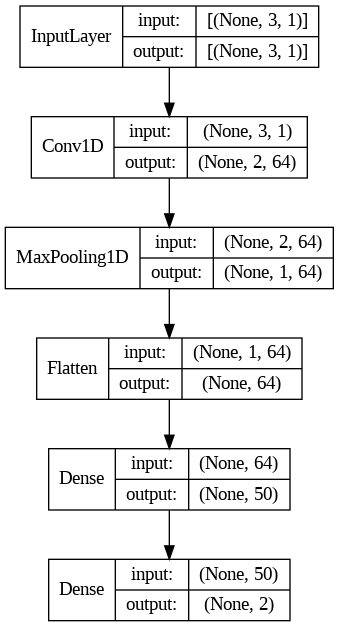

In [ ]:
plot_model(model_6_judith, show_layer_names=False, show_shapes=True)

In [ ]:
# fit model
history_6_judith = model_6_judith.fit(X_judith, y_judith, epochs=1000, verbose=0)

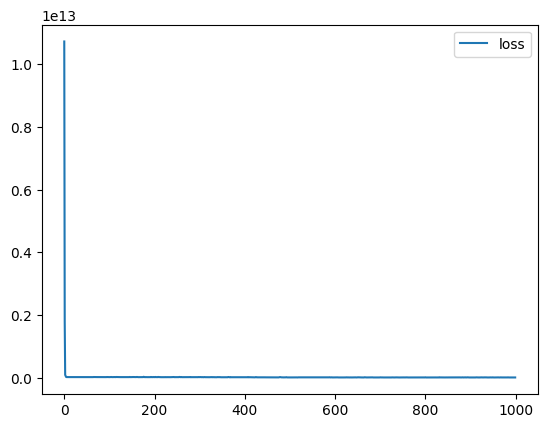

In [ ]:
pd.DataFrame(history_6_judith.history).plot()
plt.show()

In [ ]:
# Predecir con nuestro modelo
x_input_judith = X_judith[-1].reshape((1, n_steps_in_judith, n_features_judith))
yhat_judith = model_6_judith.predict(x_input_judith, verbose=0)
yhat_judith

array([[1732722. , 1706995.5]], dtype=float32)

###### 3.2 Serie temporal multivariada

In [ ]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1

        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
# Elegir un número de pasos de tiempo
n_steps_in_judith, n_steps_out_judith = 3, 2

X_judith, y_judith = split_multivariate_sequence_m_step(df_dummies_judith.to_numpy(), n_steps_in_judith, n_steps_out_judith)

In [ ]:
X_judith.shape, y_judith.shape

((542, 3, 13), (542, 2))

In [ ]:
X_judith[0], y_judith[0]

(array([[7420,    4,    2,    3,    2,    1,    0,    0,    0,    1,    1,
            0,    0],
        [8960,    4,    4,    4,    3,    1,    0,    0,    0,    1,    0,
            0,    0],
        [9960,    3,    2,    2,    2,    1,    0,    1,    0,    0,    1,
            1,    0]]),
 array([12250000, 12215000]))

In [ ]:
n_features_judith = X_judith.shape[2]

# Definir el modelo
model_7_judith = Sequential()
model_7_judith.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in_judith, n_features_judith)))
model_7_judith.add(MaxPooling1D())
model_7_judith.add(Flatten())
model_7_judith.add(Dense(50, activation='relu'))
model_7_judith.add(Dense(n_steps_out_judith))
model_7_judith.compile(optimizer='adam', loss='mse')
# fit model_7
model_7_judith.fit(X_judith, y_judith, epochs=2000, verbose=0)

model_7_judith.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 2, 64)             1728      
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 50)                3250      
                                                                 
 dense_21 (Dense)            (None, 2)                 102       
                                                                 
Total params: 5080 (19.84 KB)
Trainable params: 5080 (19.84 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
# Predecir con nuestro modelo
x_input_judith = X_judith[-1].reshape((1, n_steps_in_judith, n_features_judith))
yhat_judith = model_7_judith.predict(x_input_judith, verbose=0)
yhat_judith

array([[2698192.2, 2685751.5]], dtype=float32)

###### 3.3 Serie temporal multivariada predicción múltiple de cada entrada

In [ ]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step_parallel(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
# Elegir un número de pasos de tiempo
n_steps_in_judith, n_steps_out_judith = 3, 2

X_judith, y_judith = split_multivariate_sequence_m_step_parallel(df_dummies_judith.to_numpy(), n_steps_in_judith, n_steps_out_judith)

In [ ]:
X_judith.shape, y_judith.shape

((541, 3, 14), (541, 2, 14))

In [ ]:
X_judith[0], y_judith[0]

(array([[    7420,        4,        2,        3,        2,        1,
                0,        0,        0,        1,        1,        0,
                0, 13300000],
        [    8960,        4,        4,        4,        3,        1,
                0,        0,        0,        1,        0,        0,
                0, 12250000],
        [    9960,        3,        2,        2,        2,        1,
                0,        1,        0,        0,        1,        1,
                0, 12250000]]),
 array([[    7500,        4,        2,        2,        3,        1,
                0,        1,        0,        1,        1,        0,
                0, 12215000],
        [    7420,        4,        1,        2,        2,        1,
                1,        1,        0,        1,        0,        0,
                0, 11410000]]))

In [ ]:
# flatten output
n_output_judith = y_judith.shape[1] * y_judith.shape[2]
y_judith = y_judith.reshape((y_judith.shape[0], n_output_judith))
y_judith.shape

(541, 28)

In [ ]:
n_features_judith = X_judith.shape[2]

# Definimos nuestro modelo
model_8_judith = Sequential()
model_8_judith.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in_judith, n_features_judith)))
model_8_judith.add(MaxPooling1D())
model_8_judith.add(Flatten())
model_8_judith.add(Dense(50, activation='relu'))
model_8_judith.add(Dense(n_output_judith))
model_8_judith.compile(optimizer='adam', loss='mse')

# fit model_8
history_8_judith = model_8_judith.fit(X_judith, y_judith, epochs=1000, verbose=0)

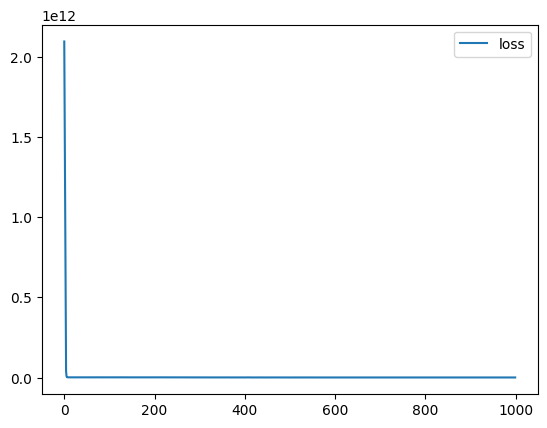

In [ ]:
pd.DataFrame(history_8_judith.history).plot()
plt.show()

In [ ]:
# Probar nuestro modelo
x_input_judith = X_judith[-1].reshape((1, n_steps_in_judith, n_features_judith))
yhat_judith = model_8_judith.predict(x_input_judith, verbose=0)
yhat_judith

array([[ 1.9346288e+03, -3.6932285e+02,  9.0454645e+02,  7.7045129e+02,
         1.9036345e+02,  6.2692738e+01,  8.2221649e+02, -2.4326472e+02,
        -7.1121423e+02, -1.3076953e+02,  1.4057926e+03,  8.0668909e+02,
        -1.2062716e+02,  1.7344659e+06,  4.8262357e+02,  1.2875437e+03,
         2.3694206e+02,  3.8947522e+02,  3.0916223e+02,  1.5550184e+03,
         4.6316019e+02, -4.7320551e+02,  4.7736011e+02,  4.2024380e+02,
         5.7419464e+02,  9.7397931e+02,  2.4302957e+02,  1.7127576e+06]],
      dtype=float32)

In [ ]:
yhat_judith.shape

(1, 28)

In [ ]:
[yhat_judith[i].reshape(n_steps_out_judith, n_features_judith) for i in range(yhat_judith.shape[0])]

[array([[ 1.9346288e+03, -3.6932285e+02,  9.0454645e+02,  7.7045129e+02,
          1.9036345e+02,  6.2692738e+01,  8.2221649e+02, -2.4326472e+02,
         -7.1121423e+02, -1.3076953e+02,  1.4057926e+03,  8.0668909e+02,
         -1.2062716e+02,  1.7344659e+06],
        [ 4.8262357e+02,  1.2875437e+03,  2.3694206e+02,  3.8947522e+02,
          3.0916223e+02,  1.5550184e+03,  4.6316019e+02, -4.7320551e+02,
          4.7736011e+02,  4.2024380e+02,  5.7419464e+02,  9.7397931e+02,
          2.4302957e+02,  1.7127576e+06]], dtype=float32)]